In [5]:
import numpy as np
import matplotlib.pyplot as plt

nn = 15   #nc=10是勉强的，nc=8是不行的
E1, E2, w, nc = 0.08, 0.046, 0.057, nn

def fuhao(theta):
    if theta < 0:
        return -1
    else:
        return 1

#定义基频光电场：S方向
def Efs_field_sin2(t, theta=-45):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >= -duration/2) & (t <= duration/2))
    result[idx] = (E1*np.sqrt(1/(1+np.tan(theta*np.pi/180)**2))*
          np.sin(w*(t[idx]-duration/2)/(2.*nc))**2*np.cos(w*t[idx]))
    return result

#定义基频光电场：P方向
def Efp_field_sin2(t,theta=-45):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >= -duration/2) & (t <= duration/2))
    result[idx] = (E1*np.sqrt(np.tan(theta*np.pi/180)**2/(1+np.tan(theta*np.pi/180)**2))*
          np.sin(w*(t[idx]-duration/2)/(2.*nc))**2*fuhao(theta)*np.sin(w*t[idx]))
    return result

#定义倍频光电场矢势，倍频光是圆偏场
def Eds_field_sin2(t, DT):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >=- duration/2+DT*41.34) & (t <= duration/2+DT*41.34))
    result[idx] = (E2*np.cos(np.pi/4)* np.sin(w*(t[idx]-duration/2-DT*41.34)/(2.*nc))**2*
          np.cos(2*w*(t[idx]-DT*41.34)))
    return result

def Edp_field_sin2(t, DT):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >=- duration/2+DT*41.34) & (t <= duration/2+DT*41.34))
    result[idx] = (E2*np.sin(np.pi/4)* np.sin(w*(t[idx]-duration/2-DT*41.34)/(2.*nc))**2*
          np.sin(2*w*(t[idx]-DT*41.34)))
    return result


time = np.linspace(-1400., 1400., 2801)
nt = len(time)
dt = time[1] - time[0]

tau0 = np.linspace(-15., 15., 420)

intensity_S, intensity_P = [], []
no = 0

Ei, Eh = 15.576/27.2116, 0.5  
r = Ei/Eh
def W(E):    #定义电离率
    E = 0.000001 + abs(E)
    return (4.0/E)*r**(5/2)*np.exp((-2/(3*E))*(r**(3/2)))

for ta in tau0:
    ES = Efs_field_sin2(time) + Eds_field_sin2(time, ta)    
    EP = Efp_field_sin2(time) + Edp_field_sin2(time, ta)
    E, Ne, sumN = np.zeros(nt, dtype = complex), [], 0
    E.real, E.imag = ES, EP

    for k in range(nt-1):
        sumN += 0.5*(W(abs(E[k]))+W(abs(E[k+1]))) * dt  #梯形积分
        Ne.append(sumN)
    Ne = np.pad(Ne, (1,0), 'constant')
    dJ_dt_S = -Ne*ES
    dJ_dt_P = -Ne*EP  
    js = np.cumsum(dJ_dt_S)*dt
    jp = np.cumsum(dJ_dt_P)*dt
    intensity_S.append(js[-1]**2)
    intensity_P.append(jp[-1]**2)

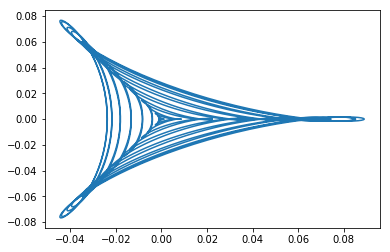

In [7]:
plt.plot( Efs_field_sin2(time) + Eds_field_sin2(time, 0), Efp_field_sin2(time) + Edp_field_sin2(time, 0))

Text(0.5,1,'Counter-rotating P-P value')

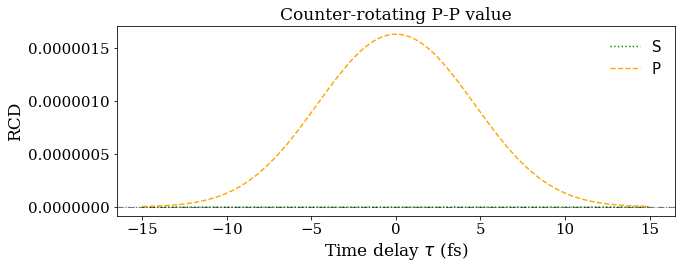

In [6]:
nofont = {'fontname':'serif'}
Size = 15
plt.figure(figsize=(10,3.5))
plt.axhline(0, alpha=0.1, color='black', ls='--')
plt.plot(tau0, intensity_S, color="green",linewidth=1.4,linestyle=':',label='S')
plt.plot(tau0, intensity_P, color="orange",linewidth=1.4,linestyle='--',label='P')
#plt.plot(tau0, np.abs(intensity_S) + np.abs(intensity_P), color="m",linewidth=1.4,label='Sum')
plt.legend(loc=1, prop={'size': 15},frameon=False)
plt.axhline(y=0,color='black',linestyle='-.',linewidth=1, alpha=0.5)
ax=plt.gca()
for label in (ax.get_xticklabels()):
    label.set_fontname('serif')
for label in (ax.get_yticklabels()):
    label.set_fontname('serif')
plt.tick_params(axis='both', labelsize=Size)
plt.xlabel(r'Time delay $\tau$ (fs)',size=Size+2, **nofont)
plt.ylabel(r'RCD',size=Size+2, **nofont)
plt.title("Counter-rotating P-P value", size=Size+2, **nofont)
# plt.xlim(-5, 5)